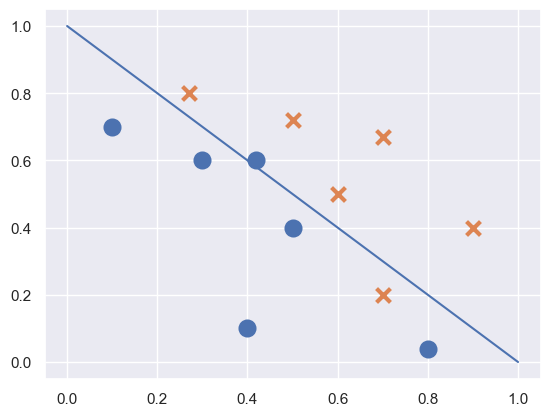

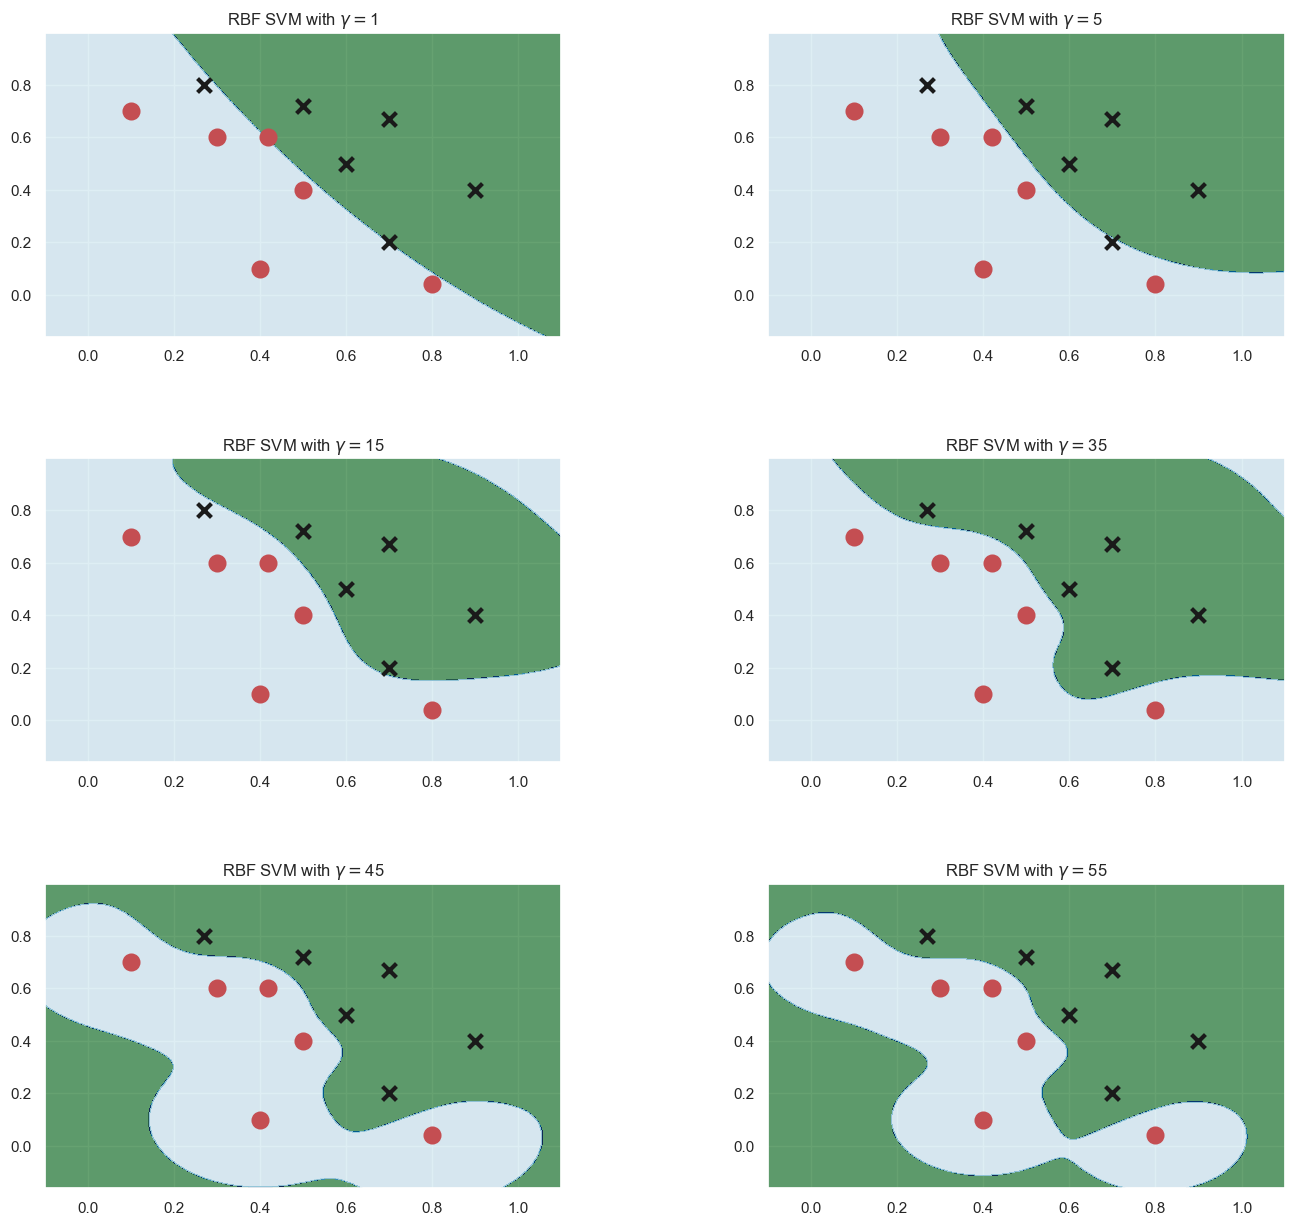

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
sns.set()

 
data = np.array([
    [0.1, 0.7],
    [0.3, 0.6],
    [0.4, 0.1],
    [0.5, 0.4],
    [0.8, 0.04],
    [0.42, 0.6],
    [0.9, 0.4],
    [0.6, 0.5],
    [0.7, 0.2],
    [0.7, 0.67],
    [0.27,0.8],
    [0.5, 0.72]
    ])
 
target = [1] * 6 + [0] * 6
 
x_line = np.linspace(0, 1, 100)
y_line = 1 - x_line
plt.scatter(data[:6, 0], data[:6, 1], marker='o', s=100, lw=3)
plt.scatter(data[6:, 0], data[6:, 1], marker='x', s=100, lw=3)
plt.plot(x_line, y_line)
 
# 定义计算域、文字说明等
 
C = 0.0001  # SVM regularization parameter, since Scikit-learn doesn't allow C=0
# linear_svc = svm.SVC(kernel='linear', C=C).fit(data, target)
 
# create a mesh to plot in
h = 0.002
x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']
 
# RBF Kernel
 
plt.figure(figsize=(16, 15))
 
for i, gamma in enumerate([1, 5, 15, 35, 45, 55]):
    rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(data, target)
 
    # ravel - flatten
    # c_ - vstack
    # #把后面两个压扁之后变成了x1和x2，然后进行判断，得到结果在压缩成一个矩形
    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
 
    # Plot the training points
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
 
    plt.title('RBF SVM with $\gamma=$' + str(gamma))
 
plt.show()

In [2]:
import sys
from pathlib import Path
curr_path = str(Path().absolute()) # 当前文件所在绝对路径
parent_path = str(Path().absolute().parent) # 父路径
sys.path.append(parent_path) # 添加路径到系统路径

from Mnist.load_data import load_local_mnist
from sklearn import svm

In [3]:
(X_train, y_train), (X_test, y_test) = load_local_mnist(normalize=True,one_hot=False)

# 截取部分数据，否则程序运行可能超时
X_train, y_train= X_train[:2000], y_train[:2000] 
X_test, y_test = X_test[:200],y_test[:200]

'''系数说明
    C: 软间隔的惩罚系数
    kernel: 核函数
    gamma: 核函数系数，只对rbf,poly,sigmod有效。默认为1/n_features
    cache_size: 训练所需要的内存,以MB为单位,默认200M
'''
# 构造svm分类器实例
model_linear = svm.SVC(C=1.0, kernel='linear') # 线性核
model_poly = svm.SVC(C=1.0, kernel='poly', degree=3) # 多项式核
model_rbf = svm.SVC(C=100.0, kernel='rbf', gamma=0.5) # 高斯核1
model_rbf2 = svm.SVC(C=100.0, kernel='rbf', gamma=0.1) # 高斯核2
models = [model_linear,model_poly,model_rbf,model_rbf2]
titles = [  'Linear Kernel',
        'Polynomial Kernel with Degree = 3',
        'Gaussian Kernel with gamma = 0.5',
        'Gaussian Kernel with gamma = 0.1']
for model, i in zip(models, range(len(models))):
    model.fit(X_train, y_train)
    print(f"{titles[i]}'s score: {model.score(X_test,y_test)}")

Linear Kernel's score: 0.955
Polynomial Kernel with Degree = 3's score: 0.935
Gaussian Kernel with gamma = 0.5's score: 0.195
Gaussian Kernel with gamma = 0.1's score: 0.78
